<a href="https://colab.research.google.com/github/LuisPeMoraRod/IA-Laboratories/blob/main/Lab1_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Ejercicio 1

In [24]:
# import libraries
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt #for plotting
import torch
import numpy as np
import gc
import math

In [19]:
heights = [1.25,1.28,1.27,1.21,1.22,1.29,1.3,1.24,1.27,1.29,1.25,1.28,1.27,1.21,1.22,1.29,1.3,1.24,1.27,1.29,1.25,1.28,1.27,1.21,1.22,1.29,1.3,1.24,1.27,1.29]
weights = [32,33,34,30,32,35,34,32,32,35,33,35,34,30,33,34,35,32,33,33,33,34,34,31,32,34,34,31,35,34]
x_data = torch.tensor(heights, dtype=torch.float64)
y_data = torch.tensor(weights, dtype=torch.float64)

#### Opcional

In [ ]:
N_SAMPLES = 100000 #number of samples
N_FEATURES = 1 #number of features
N_INFORMATIVE = 1 #number of useful features
NOISE = 10 #bias and standard deviation of the guassian noise
x, y, coef = make_regression(n_samples=N_SAMPLES,
                            n_features=N_FEATURES,
                            n_informative=N_INFORMATIVE, 
                            noise=NOISE,
                            coef=True, # return the coefficients of the underlying linear model
                            random_state=0) #set for same data points for each run

# Scale feature x (students' height) to range [1.20, 1.40]
x = np.interp(x, (x.min(), x.max()), (1.20, 1.40))
x_data = torch.tensor(x)

# Scale target y (students' weight) to range [25,40] 
y = np.interp(y, (y.min(), y.max()), (25, 40))
y_data = torch.tensor(y)


Text(0.5, 1.0, 'Height Vs. Weight')

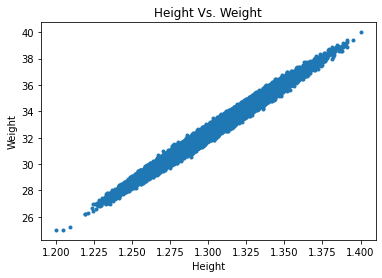

In [ ]:
# Plotting data
plt.ion() #interactive plot on
plt.plot(x,y,'.',label='training data')
plt.xlabel('Height');plt.ylabel('Weight')
plt.title('Height Vs. Weight')

### Ejercicio 2

In [ ]:
def linearRegression (array_X,array_Y):
  #x and y average
  x_avg = torch.mean(array_X)
  y_avg = torch.mean(array_Y)

  #data needed to calculate b and a
  xi_xm = torch.add(array_X, -(x_avg))
  yi_ym = torch.add(array_Y, -(y_avg))

  num = torch.mul(xi_xm,yi_ym)
  den = torch.pow(xi_xm,2)

  num_sum = torch.sum(num)
  den_sum = torch.sum(den)

  #Linear regression y = a + bx
  #b calculation
  b = num_sum / den_sum
  #a calculation
  a = y_avg - (b*x_avg)
  
  return (a,b)

print(linearRegression(x_data, y_data))

100000


### Ejercicio 3



#### a. Explicación del cálculo y la fórmula

El **coeficiente de Pearson** o coeficiente de correlación lineal es una medida estadística usada para determinar la relación entre dos variables estudiadas.

Para calcular el coeficiente de correlación de Pearson entre dos variables, se debe *dividir la covarianza de dichas variables por la raíz cuadrada del producto de sus varianzas*; es decir:

\\
\begin{align}
\rho = \frac{cov(x,y)}{\sqrt{var(x) \cdot var(y)}},
\end{align}

\\

donde, las funciones de covarianza **cov** y varianza **var** se definen como:

\begin{align}
  cov(x,y)=\frac{\sum\limits_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{n-1}\\
\end{align}

\begin{align}
  var(x)=\frac{\sum\limits_{i=1}^{n} (x_i - \bar{x})^2}{n-1}\\
\end{align}

\begin{align}
  var(y)=\frac{\sum\limits_{i=1}^{n} (y_i - \bar{y})^2}{n-1}\\
\end{align}

\\
El valor del coeficiente de correlación de Pearson está entre $-1$ y $1$, ambos incluidos. 













#### b. Desarrollo del cálculo para el set de datos

In [27]:
def getPearsonCoeff(x : torch.Tensor, y: torch.Tensor):
  variables = torch.tensor([x.tolist(), y.tolist()])
  covariance_matrix = torch.cov(variables)
  covariance = covariance_matrix[0][1]
  variance_x = covariance_matrix[0][0]
  variance_y = covariance_matrix[1][1]
  rho = covariance / math.sqrt(variance_x*variance_y)
  return rho

print(getPearsonCoeff(x_data, y_data))

tensor(0.8282)
